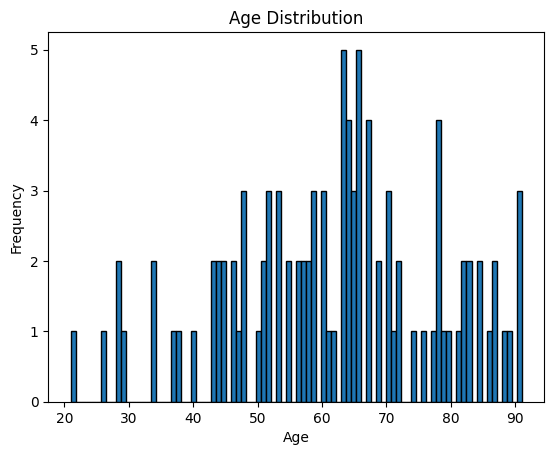

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
path = "/kaggle/input/mimic-4/mimic-iv-clinical-database-demo-2.2/hosp/patients.csv"
data = pd.read_csv(path)
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['anchor_age'])

# Plot the histogram
plt.hist(data['anchor_age'], bins=90, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [4]:
from scipy.stats import normaltest
# Perform the D'Agostino-Pearson test on the 'anchor_age' column
statistic, p_value = normaltest(data['anchor_age'])
print(f'D\'Agostino-Pearson test statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpretation of the result
if p_value > 0.05:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

D'Agostino-Pearson test statistic: 1.5224
p-value: 0.4671
The data is normally distributed (fail to reject H0)


In [9]:
from scipy.stats import norm
import numpy as np

# Estimate parameters for a normal distribution
mean_age = data['anchor_age'].mean()
std_age = data['anchor_age'].std()

# Generate synthetic age data
synthetic_ages = norm.rvs(loc=mean_age, scale=std_age, size=299712)


In [10]:
len(data['anchor_age'])

299712

In [11]:
synthetic_ages

array([58.1247289 , 45.34361679, 47.98769094, ..., 58.38646387,
       57.15308979, 33.56866962])

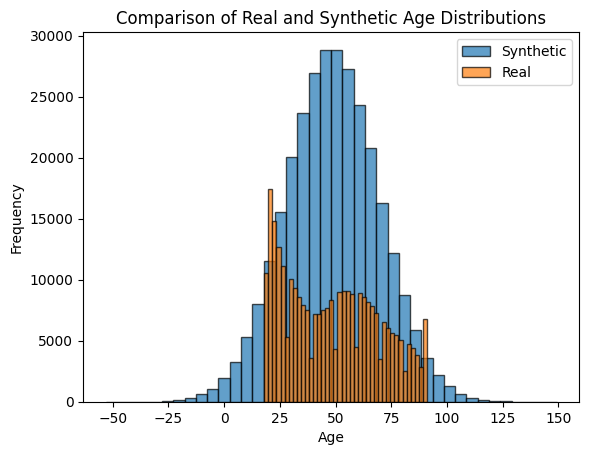

In [12]:
plt.hist(synthetic_ages, bins=40, edgecolor='black', alpha=0.7, label='Synthetic')
plt.hist(data['anchor_age'], bins=40, edgecolor='black', alpha=0.7, label='Real')
plt.title('Comparison of Real and Synthetic Age Distributions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [13]:
from scipy.stats import gaussian_kde
import numpy as np

# Extract the age data
age_data = data['anchor_age']

# Perform KDE
kde = gaussian_kde(age_data)

# Generate a range of values
age_range = np.linspace(age_data.min(), age_data.max(), 1000)
pdf_values = kde(age_range)


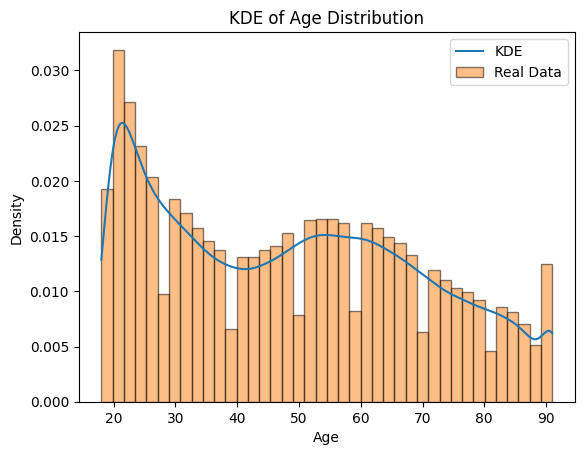

In [14]:
plt.plot(age_range, pdf_values, label='KDE')
plt.hist(age_data, bins=40, density=True, alpha=0.5, edgecolor='black', label='Real Data')
plt.title('KDE of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [15]:
from scipy.interpolate import interp1d

# Cumulative distribution function (CDF)
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]  # Normalize

# Inverse CDF (Quantile function)
inverse_cdf = interp1d(cdf_values, age_range, bounds_error=False, fill_value="extrapolate")

# Generate uniform random values
uniform_samples = np.random.rand(299712)

# Generate synthetic ages using the inverse CDF
synthetic_ages = inverse_cdf(uniform_samples)


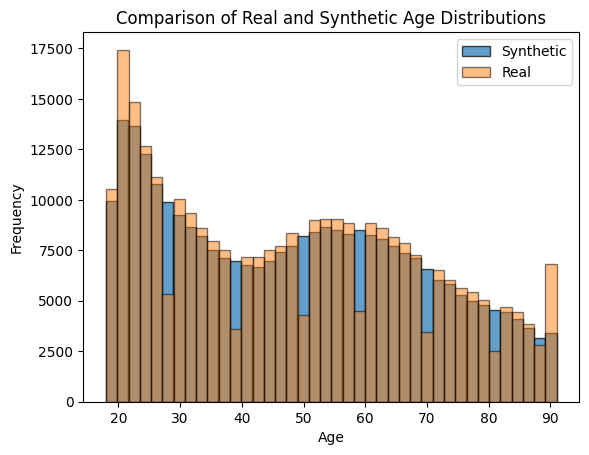

In [16]:
plt.hist(synthetic_ages, bins=40, edgecolor='black', alpha=0.7, label='Synthetic')
plt.hist(age_data, bins=40, edgecolor='black', alpha=0.5, label='Real')
plt.title('Comparison of Real and Synthetic Age Distributions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [17]:
from scipy.stats import ks_2samp

# Perform the KS test
ks_statistic, p_value = ks_2samp(age_data, synthetic_ages)
print(f'KS Statistic: {ks_statistic}, P-value: {p_value}')


KS Statistic: 0.02889440529575059, P-value: 3.9909545983488075e-109


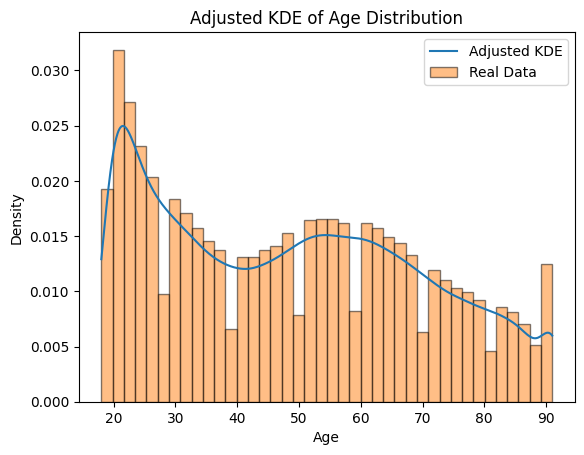

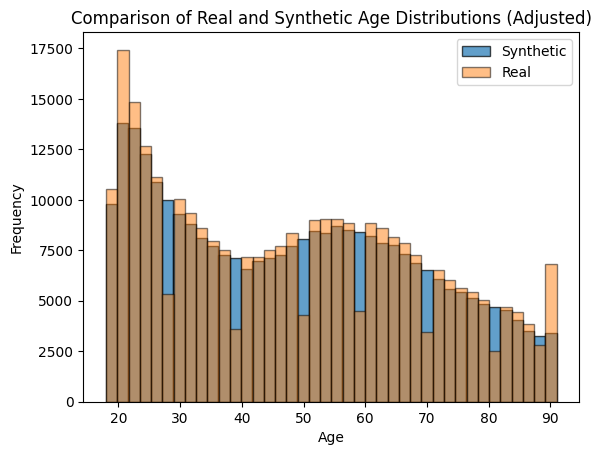

KS Statistic: 0.02981862588084562, P-value: 3.427354834714497e-116


In [18]:
# Adjust KDE bandwidth
kde = gaussian_kde(age_data, bw_method='silverman')  # 'silverman' is one option, you can try others like 'scott' or a custom value

# Recalculate PDF values
pdf_values = kde(age_range)

# Plot the new KDE
plt.plot(age_range, pdf_values, label='Adjusted KDE')
plt.hist(age_data, bins=40, density=True, alpha=0.5, edgecolor='black', label='Real Data')
plt.title('Adjusted KDE of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Generate new synthetic ages
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]  # Normalize

inverse_cdf = interp1d(cdf_values, age_range, bounds_error=False, fill_value="extrapolate")
uniform_samples = np.random.rand(299712)
synthetic_ages = inverse_cdf(uniform_samples)

# Visualize and compare again
plt.hist(synthetic_ages, bins=40, edgecolor='black', alpha=0.7, label='Synthetic')
plt.hist(age_data, bins=40, edgecolor='black', alpha=0.5, label='Real')
plt.title('Comparison of Real and Synthetic Age Distributions (Adjusted)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Re-run KS test
ks_statistic, p_value = ks_2samp(age_data, synthetic_ages)
print(f'KS Statistic: {ks_statistic}, P-value: {p_value}')


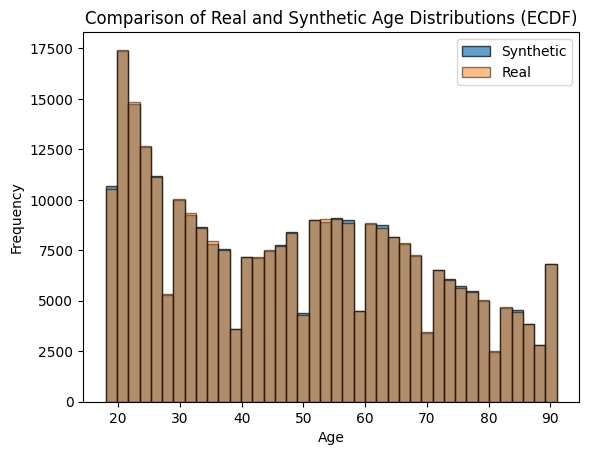

KS Statistic: 0.0008074418108050541, P-value: 0.9999727998587987


In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

# Calculate the empirical CDF
ecdf = ECDF(age_data)

# Generate uniform random values
uniform_samples = np.random.rand(299712)

# Generate synthetic ages using the empirical CDF
synthetic_ages = np.interp(uniform_samples, ecdf.y, ecdf.x)

# Visualize and compare again
plt.hist(synthetic_ages, bins=40, edgecolor='black', alpha=0.7, label='Synthetic')
plt.hist(age_data, bins=40, edgecolor='black', alpha=0.5, label='Real')
plt.title('Comparison of Real and Synthetic Age Distributions (ECDF)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Re-run KS test
ks_statistic, p_value = ks_2samp(age_data, synthetic_ages)
print(f'KS Statistic: {ks_statistic}, P-value: {p_value}')


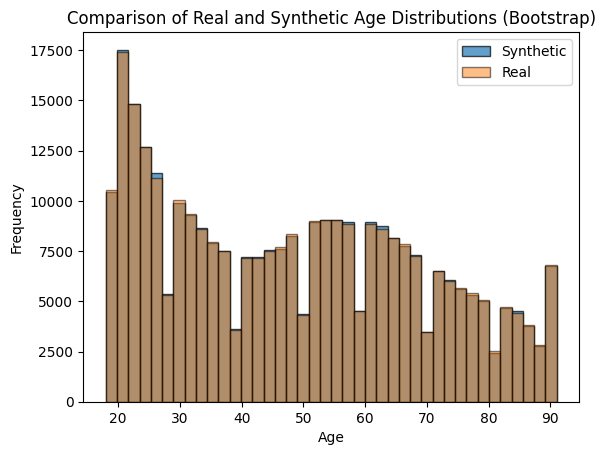

KS Statistic: 0.0015414798206278002, P-value: 0.8680263258413718


In [20]:
# Bootstrap sampling
bootstrap_samples = np.random.choice(age_data, size=299712, replace=True)

# Visualize and compare again
plt.hist(bootstrap_samples, bins=40, edgecolor='black', alpha=0.7, label='Synthetic')
plt.hist(age_data, bins=40, edgecolor='black', alpha=0.5, label='Real')
plt.title('Comparison of Real and Synthetic Age Distributions (Bootstrap)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Re-run KS test
ks_statistic, p_value = ks_2samp(age_data, bootstrap_samples)
print(f'KS Statistic: {ks_statistic}, P-value: {p_value}')


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv(path)

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# Convert categorical columns to numerical
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

# Extract year range into start and end year
data[['start_year', 'end_year']] = data['anchor_year_group'].str.split(' - ', expand=True).astype(int)
data.drop(columns=['anchor_year_group'], inplace=True)

# Handle missing values in 'dod' column
# Use a more reasonable placeholder date for missing values
data['dod'] = data['dod'].fillna('1970-01-01')
data['dod'] = pd.to_datetime(data['dod'])
data['dod'] = data['dod'].view('int64') // 10**9  # Convert to Unix timestamp

# Standardize the numerical columns
scaler = StandardScaler()
data[['anchor_age', 'anchor_year', 'start_year', 'end_year', 'dod']] = scaler.fit_transform(data[['anchor_age', 'anchor_year', 'start_year', 'end_year', 'dod']])

# Convert the DataFrame to a NumPy array
data_array = data.drop(columns=['subject_id']).to_numpy()

   subject_id gender  anchor_age  anchor_year anchor_year_group         dod

0    10000032      F          52         2180       2014 - 2016  2180-09-09

1    10000048      F          23         2126       2008 - 2010         NaN

2    10000068      F          19         2160       2008 - 2010         NaN

3    10000084      M          72         2160       2017 - 2019  2161-02-13

4    10000102      F          27         2136       2008 - 2010         NaN


In [5]:
import pandas as pd

# Load the data

patients_df = pd.read_csv(path)

# Display the first few rows of the dataframe
patients_df.head()


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical variable
le = LabelEncoder()
patients_df['gender'] = le.fit_transform(patients_df['gender'])

# Fill missing values in 'dod' with a placeholder (e.g., 0 for null dates)
patients_df['dod'] = patients_df['dod'].fillna('0000-00-00')

# Extract year from 'dod' for simplicity
patients_df['dod'] = patients_df['dod'].apply(lambda x: int(x.split('-')[0]))

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['anchor_age', 'anchor_year', 'dod']
patients_df[numerical_features] = scaler.fit_transform(patients_df[numerical_features])

# Display the preprocessed data
patients_df.head()


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,0,0.000000,0.164835,2011 - 2013,0.000000
1,10003400,0,0.728571,0.263736,2011 - 2013,0.970922
2,10002428,0,0.842857,0.494505,2011 - 2013,0.000000
3,10032725,0,0.242857,0.362637,2011 - 2013,0.973648
4,10027445,0,0.385714,0.351648,2011 - 2013,0.975011


In [32]:
pip install ace_tools

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nflows

In [6]:
import pandas as pd

data = pd.read_csv('/kaggle/input/person/person.csv')

# Display basic information and statistics
data_info = data.info()
data_description = data.describe()
data_head = data.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   person_id                 5286 non-null   int64  
 1   gender                    5285 non-null   object 
 2   birthdate                 5284 non-null   object 
 3   birthdate_estimated       5286 non-null   int64  
 4   dead                      5286 non-null   int64  
 5   death_date                0 non-null      float64
 6   cause_of_death            0 non-null      float64
 7   creator                   5286 non-null   int64  
 8   date_created              5286 non-null   object 
 9   changed_by                0 non-null      float64
 10  date_changed              0 non-null      float64
 11  voided                    5286 non-null   int64  
 12  voided_by                 0 non-null      float64
 13  date_voided               0 non-null      float64
 14  void_rea

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
from torch.optim import Adam
from nflows.flows import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from scipy.sparse import csr_matrix




In [ ]:

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Define imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create preprocessing pipeline
numerical_pipeline = Pipeline([('imputer', numerical_imputer), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('imputer', categorical_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

# Apply transformations
data_prepared = preprocessor.fit_transform(data)

# Convert sparse matrix to dense
if isinstance(data_prepared, csr_matrix):
    data_prepared = data_prepared.toarray()

# Define the normalizing flow model
num_layers = 5
input_dim = data_prepared.shape[1]
hidden_features = 64  # Example number of hidden features

transforms = [MaskedAffineAutoregressiveTransform(features=input_dim, hidden_features=hidden_features) for _ in range(num_layers)]
transform = CompositeTransform(transforms)
base_distribution = StandardNormal([input_dim])
flow = Flow(transform, base_distribution)

# Prepare data for PyTorch
data_tensor = torch.tensor(data_prepared, dtype=torch.float32)

# Define training parameters
optimizer = Adam(flow.parameters(), lr=1e-3)
num_epochs = 1000
batch_size = 64

# Training loop
for epoch in range(num_epochs):
    indices = torch.randperm(data_tensor.size(0))[:batch_size]
    batch = data_tensor[indices]
    loss = -flow.log_prob(inputs=batch).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Generate synthetic data
num_samples = 1000
synthetic_data = flow.sample(num_samples).detach().numpy()

# Separate numerical and categorical data from the synthetic data
num_data_synthetic = synthetic_data[:, :len(numerical_columns)]
cat_data_synthetic = synthetic_data[:, len(numerical_columns):]

# Inverse transform numerical data (only using StandardScaler)
num_scaler = preprocessor.named_transformers_['num'].named_steps['scaler']
num_data_inverse_transformed = num_scaler.inverse_transform(num_data_synthetic)

# Inverse transform categorical data
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_data_inverse_transformed = onehot_encoder.inverse_transform(cat_data_synthetic)

# Combine the numerical and categorical data
inverse_transformed_data = pd.DataFrame(num_data_inverse_transformed, columns=numerical_columns)
for i, col in enumerate(categorical_columns):
    inverse_transformed_data[col] = cat_data_inverse_transformed[:, i]

# Display the first few rows of the synthetic data
print(inverse_transformed_data.head())

In [1]:
pip install nflows

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nflows: filename=nflows-0.14-py3-none-any.whl size=53653 sha256=8a0b2c8b3928e217f38f64c06ae750d05b881e3baac11b11e7d16585ff95f585
  Stored in directory: /root/.cache/pip/wheels/ca/8f/ac/c324eb57b461632081812c33b13161878290d0e6fbb8f5a7e2
Successfully built nflows
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
import torch
from torch.optim import Adam
from nflows.transforms import MaskedAffineAutoregressiveTransform, CompositeTransform
from nflows.distributions import StandardNormal
from nflows.flows import Flow

# Load your data
# data = pd.read_csv('your_data.csv')  # Example: replace with your data loading method

# Drop columns that are entirely empty
data = data.dropna(axis=1, how='all')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Define imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create preprocessing pipeline
numerical_pipeline = Pipeline([('imputer', numerical_imputer), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('imputer', categorical_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

# Apply transformations
data_prepared = preprocessor.fit_transform(data)

# Convert sparse matrix to dense
if isinstance(data_prepared, csr_matrix):
    data_prepared = data_prepared.toarray()

# Define the normalizing flow model
num_layers = 5
input_dim = data_prepared.shape[1]
hidden_features = 64  # Example number of hidden features

transforms = [MaskedAffineAutoregressiveTransform(features=input_dim, hidden_features=hidden_features) for _ in range(num_layers)]
transform = CompositeTransform(transforms)
base_distribution = StandardNormal([input_dim])
flow = Flow(transform, base_distribution)

# Prepare data for PyTorch
data_tensor = torch.tensor(data_prepared, dtype=torch.float32)

# Define training parameters
optimizer = Adam(flow.parameters(), lr=1e-3)
num_epochs = 1000
batch_size = 64

# Training loop
for epoch in range(num_epochs):
    indices = torch.randperm(data_tensor.size(0))[:batch_size]
    batch = data_tensor[indices]
    loss = -flow.log_prob(inputs=batch).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Generate synthetic data
num_samples = 1000
synthetic_data = flow.sample(num_samples).detach().numpy()

# Separate numerical and categorical data from the synthetic data
num_data_synthetic = synthetic_data[:, :len(numerical_columns)]
cat_data_synthetic = synthetic_data[:, len(numerical_columns):]

# Inverse transform numerical data (only using StandardScaler)
num_scaler = preprocessor.named_transformers_['num'].named_steps['scaler']
num_data_inverse_transformed = num_scaler.inverse_transform(num_data_synthetic)

# Inverse transform categorical data
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_data_inverse_transformed = onehot_encoder.inverse_transform(cat_data_synthetic)

# Combine the numerical and categorical data
inverse_transformed_data = pd.DataFrame(num_data_inverse_transformed, columns=numerical_columns)
for i, col in enumerate(categorical_columns):
    inverse_transformed_data[col] = cat_data_inverse_transformed[:, i]

# Display the first few rows of the synthetic data
print(inverse_transformed_data.head())


person_id              0
gender                 1
birthdate              2
birthdate_estimated    0
dead                   0
creator                0
date_created           0
voided                 0
uuid                   0
deathdate_estimated    0
dtype: int64
Epoch 0, Loss: 26504.6328125
Epoch 100, Loss: -20308.146484375
Epoch 200, Loss: -20796.83203125
Epoch 300, Loss: -21885.005859375
Epoch 400, Loss: -24747.78125
Epoch 500, Loss: -24318.369140625
Epoch 600, Loss: -25735.6875
Epoch 700, Loss: -25219.96484375
Epoch 800, Loss: -26475.474609375
Epoch 900, Loss: -25724.263671875


In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import MultivariateNormal
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/kaggle/input/mimic-4/mimic-iv-clinical-database-demo-2.2/hosp/admissions.csv'
try:
    data = pd.read_csv(file_path)
except Exception as e:
    raise ValueError(f"Error loading the data: {e}")

# Check and preprocess the data
def preprocess_data(df):
    # Convert datetime columns to numeric or drop them
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce').astype('int64')
            except:
                df = df.drop(columns=[col])
    return df

try:
    data = preprocess_data(data)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data.values)
    dataset = CustomDataset(normalized_data)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
except Exception as e:
    raise ValueError(f"Error preprocessing the data: {e}")

# Define Normalizing Flow Model
class RealNVP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RealNVP, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.scale = nn.Sequential(
            nn.Linear(input_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim // 2),
            nn.Tanh()
        )

        self.translate = nn.Sequential(
            nn.Linear(input_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim // 2)
        )

    def forward(self, x):
        x1, x2 = x.chunk(2, dim=1)
        scale = self.scale(x1)
        translate = self.translate(x1)
        y1 = x1
        y2 = (x2 - translate) * torch.exp(-scale)
        return torch.cat((y1, y2), dim=1)

    def inverse(self, y):
        y1, y2 = y.chunk(2, dim=1)
        scale = self.scale(y1)
        translate = self.translate(y1)
        x1 = y1
        x2 = y2 * torch.exp(scale) + translate
        return torch.cat((x1, x2), dim=1)

# Initialize model, optimizer, and loss function
input_dim = normalized_data.shape[1]
hidden_dim = 128
model = RealNVP(input_dim, hidden_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for batch in dataloader:
        optimizer.zero_grad()
        batch_size = batch.size(0)
        z = MultivariateNormal(torch.zeros(batch_size, input_dim), torch.eye(input_dim)).sample()
        transformed_batch = model.forward(batch)
        log_jacobian = torch.sum(torch.log(torch.abs(transformed_batch - batch)), dim=1)
        loss = -torch.mean(log_jacobian)
        loss.backward()
        optimizer.step()

# Generate synthetic data
def generate_synthetic_data(model, num_samples):
    z = MultivariateNormal(torch.zeros(num_samples, input_dim), torch.eye(input_dim)).sample()
    synthetic_data = model.inverse(z).detach().numpy()
    return scaler.inverse_transform(synthetic_data)

try:
    num_samples = 1000
    synthetic_data = generate_synthetic_data(model, num_samples)
    synthetic_df = pd.DataFrame(synthetic_data, columns=data.columns)
    synthetic_df.to_csv('/kaggle/working/synthetic_admissions.csv', index=False)

    print("Synthetic data generated and saved successfully.")
except Exception as e:
    raise ValueError(f"Error generating synthetic data: {e}")


/tmp/ipykernel_145/2283976729.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce').astype('int64')
/tmp/ipykernel_145/2283976729.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce').astype('int64')
/tmp/ipykernel_145/2283976729.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce').astype('int64')
/tmp/ipykernel_145/2283976729.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling bac

Synthetic data generated and saved successfully.


In [2]:
pip install nflows

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nflows: filename=nflows-0.14-py3-none-any.whl size=53653 sha256=475b3b10c3ab5ac4a77b26d4960e773d34afb3260af2f1115501b860eb6c8e84
  Stored in directory: /root/.cache/pip/wheels/ca/8f/ac/c324eb57b461632081812c33b13161878290d0e6fbb8f5a7e2
Successfully built nflows
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from nflows.distributions.normal import StandardNormal
from nflows.flows.base import Flow
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import RandomPermutation
from nflows.transforms.base import CompositeTransform

# Load the data
data_path = '/kaggle/input/mimic-4/mimic-iv-clinical-database-demo-2.2/hosp/admissions.csv'
data = pd.read_csv(data_path)

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns for this example
data_numeric = data[numeric_columns]

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numeric)
data_tensor = torch.tensor(data_normalized, dtype=torch.float32)

# Define the number of features
num_features = data_normalized.shape[1]

# Define the transform (using Masked Affine Autoregressive Transform)
transforms = []
for _ in range(5):
    transforms.append(RandomPermutation(features=num_features))
    transforms.append(MaskedAffineAutoregressiveTransform(features=num_features, hidden_features=16))

transform = CompositeTransform(transforms)
base_distribution = StandardNormal(shape=[num_features])
flow = Flow(transform, base_distribution)
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-3)

# Training function
def train_flow(flow, optimizer, data, epochs=1000, batch_size=64):
    n_samples = data.shape[0]
    for epoch in range(epochs):
        flow.train()
        permutation = torch.randperm(n_samples)
        total_loss = 0

        for i in range(0, n_samples, batch_size):
            optimizer.zero_grad()
            batch_indices = permutation[i:i+batch_size]
            batch = data[batch_indices]
            loss = -flow.log_prob(inputs=batch).mean()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss/n_samples}')

# Train the model
train_flow(flow, optimizer, data_tensor)

# Generate synthetic data
def generate_synthetic_data(flow, num_samples=1000):
    flow.eval()
    with torch.no_grad():
        samples = flow.sample(num_samples)
    synthetic_data = scaler.inverse_transform(samples.numpy())
    return synthetic_data

synthetic_data = generate_synthetic_data(flow, num_samples=1000)
synthetic_data_df = pd.DataFrame(synthetic_data, columns=numeric_columns)

# Round the values to integers
synthetic_data_df = synthetic_data_df.round().astype(int)

# Display the first few rows of the synthetic data


Epoch 0, Loss: 0.16738767103715377
Epoch 100, Loss: -0.09801586671309037
Epoch 200, Loss: -0.10605124733664772
Epoch 300, Loss: -0.11810376253995028
Epoch 400, Loss: -0.11803323225541548
Epoch 500, Loss: -0.1326571395180442
Epoch 600, Loss: -0.12791723944924094
Epoch 700, Loss: -0.11769827929410068
Epoch 800, Loss: -0.12138308264992453
Epoch 900, Loss: -0.10580461328679865


In [4]:
synthetic_data_df.head()

,subject_id,hadm_id,hospital_expire_flag
0,10013541,21529708,0
1,10003528,23690186,0
2,10039808,29283370,0
3,10017431,29706006,0
4,10037824,24275558,0


In [2]:
pip install nflows

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nflows: filename=nflows-0.14-py3-none-any.whl size=53653 sha256=c6f386d7ea88cba35983eb04f933f7663bfa8ee40aff1846675745697cb93d3d
  Stored in directory: /root/.cache/pip/wheels/ca/8f/ac/c324eb57b461632081812c33b13161878290d0e6fbb8f5a7e2
Successfully built nflows
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from nflows.distributions.normal import StandardNormal
from nflows.flows.base import Flow
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import RandomPermutation
from nflows.transforms.base import CompositeTransform

# Load the new data
data_path = 'grouped_data.csv'
data = pd.read_csv(data_path)
data = data[:1000]

# Calculate the IQR for both columns
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

# Define thresholds for extreme outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR




# Remove extreme outliers from the dataset
cleaned_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Display the first few rows of the cleaned dataset to verify
cleaned_data.head()

data = cleaned_data
# Identify numeric columns, excluding 'subject_id'
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
non_numeric_columns = data.select_dtypes(exclude=['int64']).columns
print("numeric_columns: ",numeric_columns)
print("non_numeric_columns: ",non_numeric_columns)
# Drop non-numeric columns for this example
data_numeric = data[numeric_columns.columns]

print("Final dataframe: \n",data_numeric)
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numeric)
data_tensor = torch.tensor(data_normalized, dtype=torch.float32)

# Define the number of features
num_features = data_normalized.shape[1]

# Define the transform (using Masked Affine Autoregressive Transform)
transforms = []
num_layers = 5  # Increased number of layers
hidden_features = 32  # Increased number of hidden features

for _ in range(num_layers):
    transforms.append(RandomPermutation(features=num_features))
    transforms.append(MaskedAffineAutoregressiveTransform(features=num_features, hidden_features=hidden_features))

transform = CompositeTransform(transforms)
base_distribution = StandardNormal(shape=[num_features])
flow = Flow(transform, base_distribution)
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-3)

# Training function
def train_flow(flow, optimizer, data, epochs=1000, batch_size=64):
    n_samples = data.shape[0]
    for epoch in range(epochs):
        flow.train()
        permutation = torch.randperm(n_samples)
        total_loss = 0

        for i in range(0, n_samples, batch_size):
            optimizer.zero_grad()
            batch_indices = permutation[i:i+batch_size]
            batch = data[batch_indices]
            loss = -flow.log_prob(inputs=batch).mean()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss/n_samples}')

# Train the model
train_flow(flow, optimizer, data_tensor)

# Generate synthetic data
def generate_synthetic_data(flow, num_samples=100):
    flow.eval()
    with torch.no_grad():
        samples = flow.sample(num_samples)
    synthetic_data = scaler.inverse_transform(samples.numpy())
    return synthetic_data



numeric_columns:       Height (Inches)  Weight (Lbs)
0              60.00         93.10
1              70.00        170.00
2              64.56        111.13
3              68.00        168.00
4              67.38        215.87
..               ...           ...
995            66.00        117.50
996            72.58        201.43
997            62.50        122.40
998            65.00        123.00
999            68.00        136.80

[1000 rows x 2 columns]
non_numeric_columns:  Index(['Height (Inches)', 'Weight (Lbs)'], dtype='object')
Final dataframe: 
      Height (Inches)  Weight (Lbs)
0              60.00         93.10
1              70.00        170.00
2              64.56        111.13
3              68.00        168.00
4              67.38        215.87
..               ...           ...
995            66.00        117.50
996            72.58        201.43
997            62.50        122.40
998            65.00        123.00
999            68.00        136.80

[1000 rows x 2 c

In [8]:
numeric_columns

,Height (Inches),Weight (Lbs)
0,60.00,93.10
1,70.00,170.00
2,64.56,111.13
3,68.00,168.00
4,67.38,215.87
...,...,...
995,66.00,117.50
996,72.58,201.43
997,62.50,122.40
998,65.00,123.00


In [9]:
synthetic_data = generate_synthetic_data(flow, num_samples=1000)
synthetic_data_df = pd.DataFrame(synthetic_data, columns=numeric_columns.columns)

# Round the values to two decimal places
synthetic_data_df = synthetic_data_df.round(2)

# Set pandas options to avoid scientific notation
synthetic_data_df

,Height (Inches),Weight (Lbs)
0,68.239998,177.350006
1,64.959999,140.770004
2,61.849998,131.759995
3,66.900002,168.449997
4,67.040001,140.789993
...,...,...
995,61.080002,127.870003
996,62.560001,122.010002
997,71.550003,202.559998
998,73.720001,229.250000


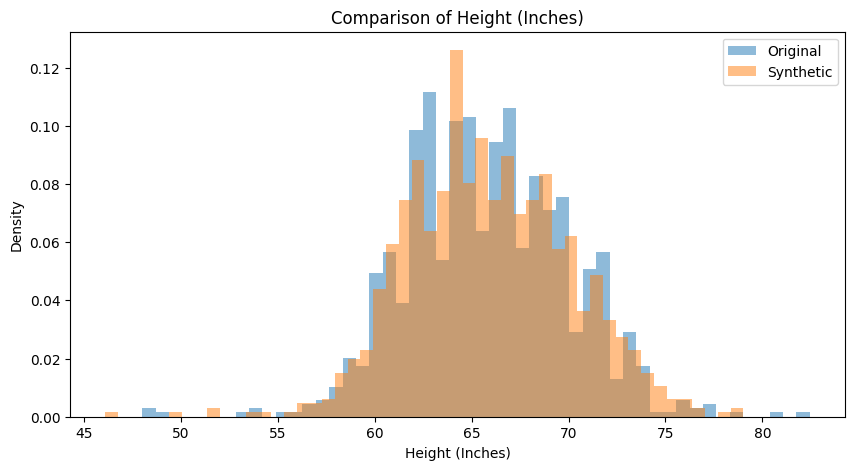

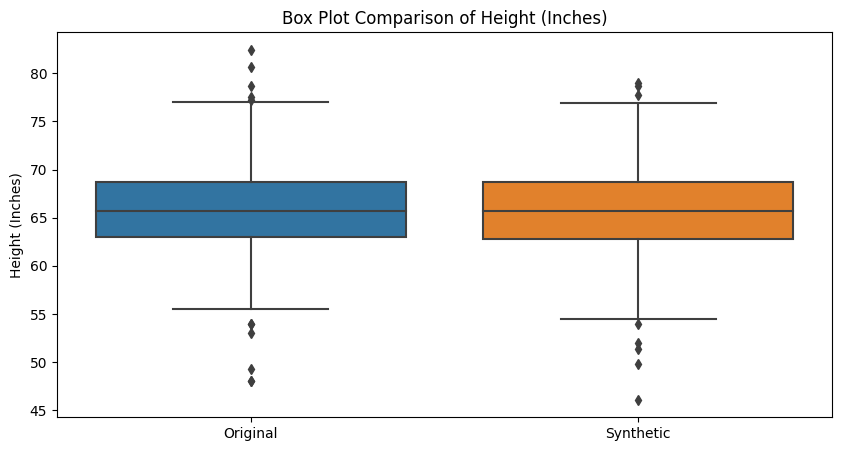

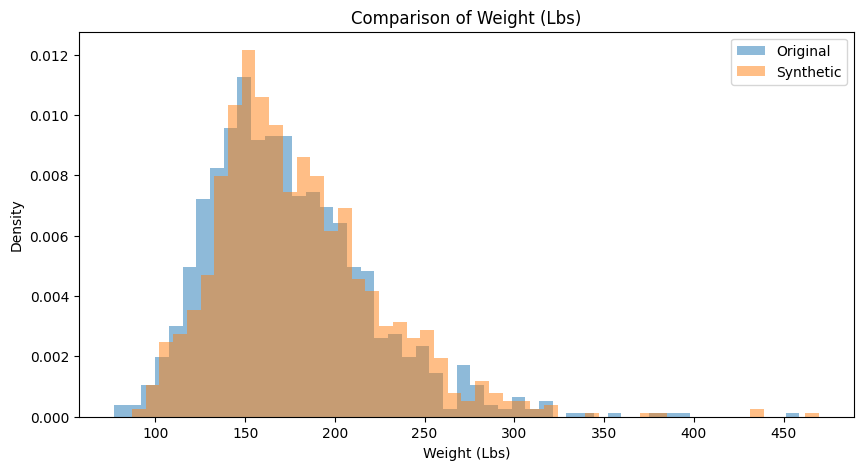

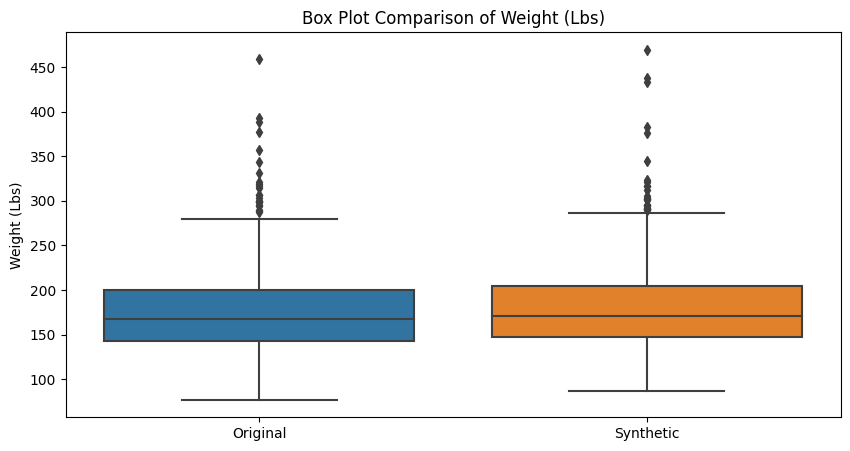

                 Original Mean  Synthetic Mean  Original Std  Synthetic Std  \
Height (Inches)       65.79200       65.872375      4.149817       4.188735   
Weight (Lbs)         174.58578      179.458618     46.056156      46.039627   

                 KS Statistic  KS p-value  
Height (Inches)         0.042    0.341125  
Weight (Lbs)            0.066    0.025634  


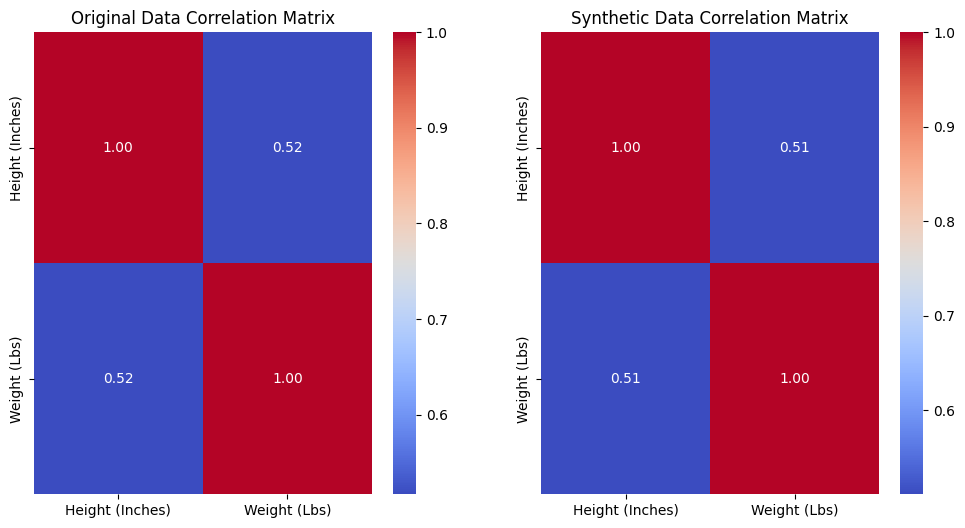

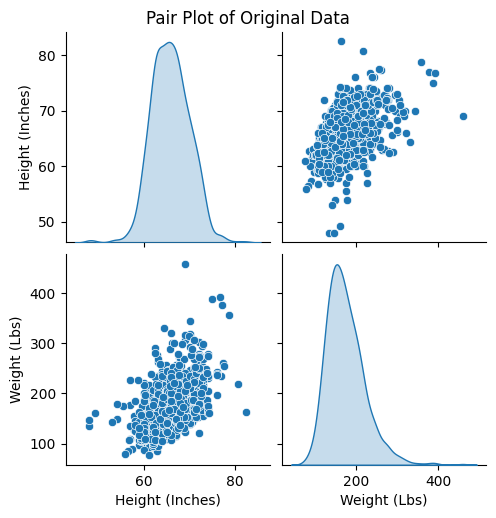

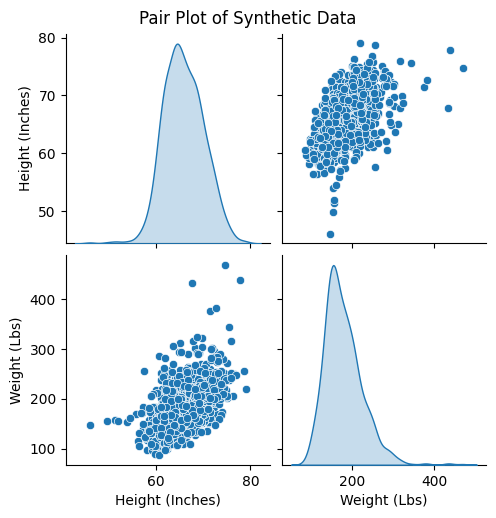

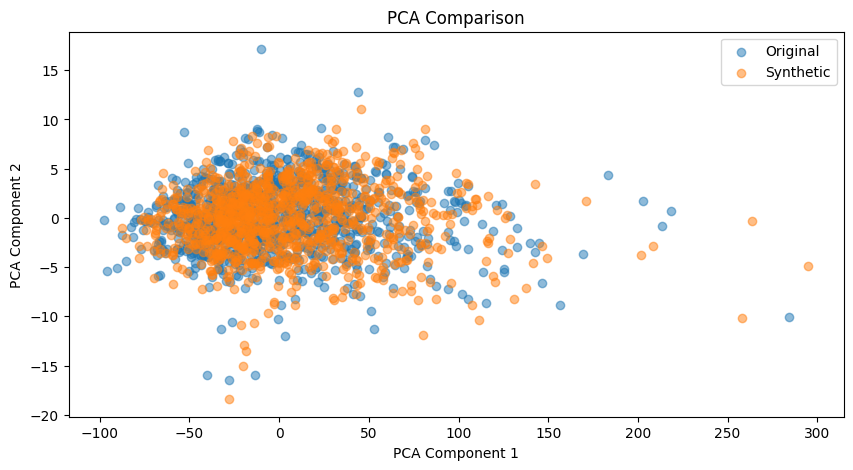

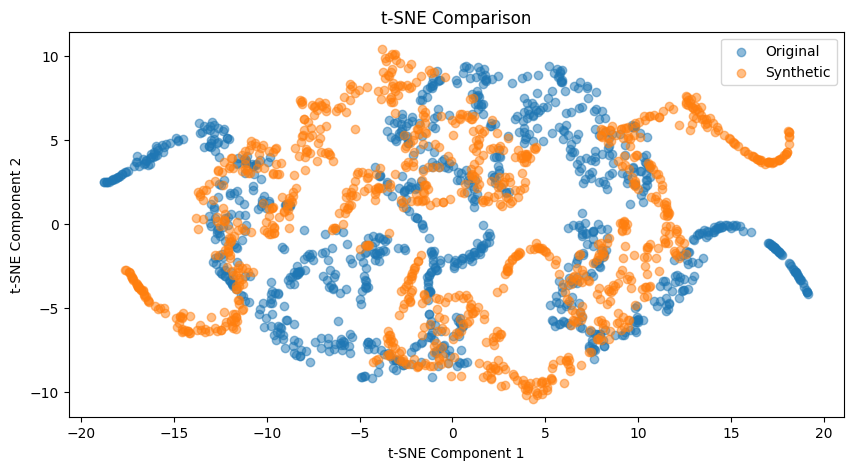

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function to compare original and synthetic data
def compare_data(original_data, synthetic_data, columns):
    comparison_results = {}
    for col in columns:
        original_col = original_data[col]
        synthetic_col = synthetic_data[col]
        
        # Statistical comparison
        comparison_results[col] = {
            'Original Mean': original_col.mean(),
            'Synthetic Mean': synthetic_col.mean(),
            'Original Std': original_col.std(),
            'Synthetic Std': synthetic_col.std(),
            'KS Statistic': ks_2samp(original_col, synthetic_col).statistic,
            'KS p-value': ks_2samp(original_col, synthetic_col).pvalue
        }
        
        # Plotting normalized histograms
        plt.figure(figsize=(10, 5))
        plt.hist(original_col, bins=50, alpha=0.5, label='Original', density=True)
        plt.hist(synthetic_col, bins=50, alpha=0.5, label='Synthetic', density=True)
        plt.title(f'Comparison of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
        
        # Plotting box plots
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=[original_col, synthetic_col])
        plt.xticks([0, 1], ['Original', 'Synthetic'])
        plt.title(f'Box Plot Comparison of {col}')
        plt.ylabel(col)
        plt.show()
        
    return pd.DataFrame(comparison_results).T

# Function to compare correlation matrices
def compare_correlations(original_data, synthetic_data):
    original_corr = original_data.corr()
    synthetic_corr = synthetic_data.corr()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(original_corr, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Original Data Correlation Matrix')

    plt.subplot(1, 2, 2)
    sns.heatmap(synthetic_corr, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Synthetic Data Correlation Matrix')
    plt.show()

    return original_corr, synthetic_corr

# Function to create pair plots
def create_pair_plots(original_data, synthetic_data, columns):
    sns.pairplot(original_data[columns], diag_kind='kde')
    plt.suptitle('Pair Plot of Original Data', y=1.02)
    plt.show()

    sns.pairplot(synthetic_data[columns], diag_kind='kde')
    plt.suptitle('Pair Plot of Synthetic Data', y=1.02)
    plt.show()

# Function to perform PCA and t-SNE comparison
def dimensionality_reduction_plot(original_data, synthetic_data, n_components=2):
    pca = PCA(n_components=n_components)
    original_pca = pca.fit_transform(original_data)
    synthetic_pca = pca.transform(synthetic_data)

    plt.figure(figsize=(10, 5))
    plt.scatter(original_pca[:, 0], original_pca[:, 1], alpha=0.5, label='Original')
    plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], alpha=0.5, label='Synthetic')
    plt.title('PCA Comparison')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

    tsne = TSNE(n_components=n_components, perplexity=30, n_iter=300)
    original_tsne = tsne.fit_transform(original_data)
    synthetic_tsne = tsne.fit_transform(synthetic_data)

    plt.figure(figsize=(10, 5))
    plt.scatter(original_tsne[:, 0], original_tsne[:, 1], alpha=0.5, label='Original')
    plt.scatter(synthetic_tsne[:, 0], synthetic_tsne[:, 1], alpha=0.5, label='Synthetic')
    plt.title('t-SNE Comparison')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

# Compare the data
comparison_results = compare_data(data_numeric, synthetic_data_df, numeric_columns)
print(comparison_results)

# Compare correlation matrices
original_corr, synthetic_corr = compare_correlations(data_numeric, synthetic_data_df)

# Create pair plots
create_pair_plots(data_numeric, synthetic_data_df, numeric_columns.columns)

# Perform PCA and t-SNE comparison
dimensionality_reduction_plot(data_numeric, synthetic_data_df)


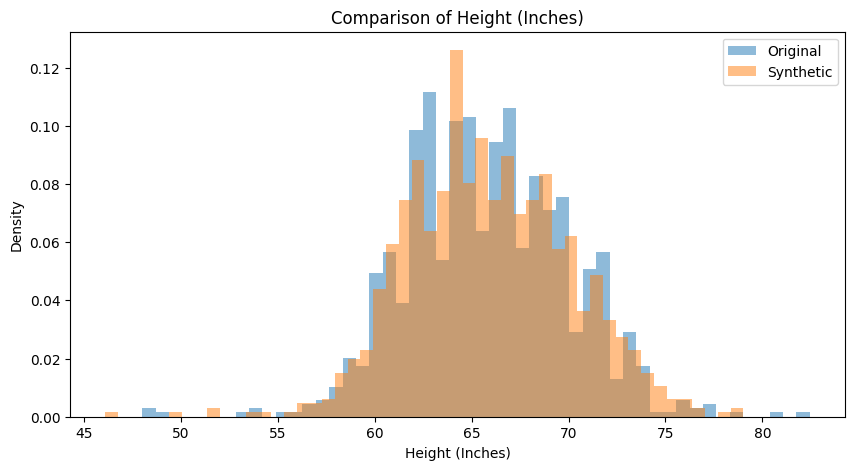

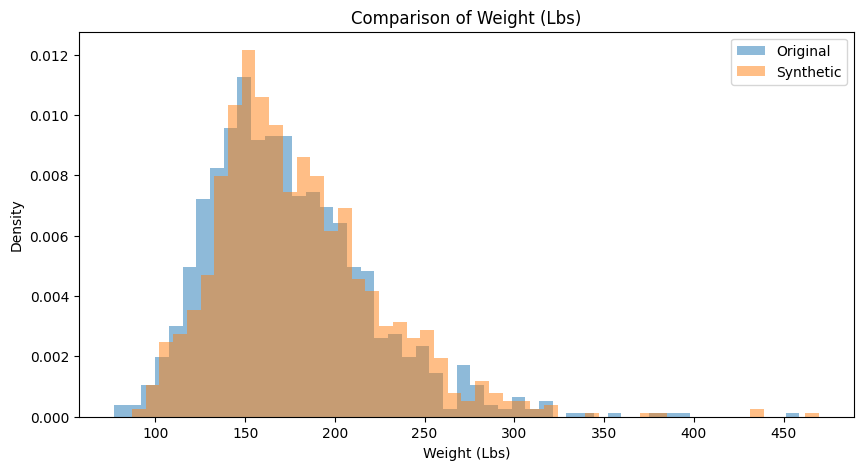

                 Original Mean  Synthetic Mean  Original Std  Synthetic Std  \
Height (Inches)       65.79200       65.872375      4.149817       4.188735   
Weight (Lbs)         174.58578      179.458618     46.056156      46.039627   

                 KS Statistic  KS p-value  
Height (Inches)         0.042    0.341125  
Weight (Lbs)            0.066    0.025634  


In [11]:
# Compare the data
comparison_results = compare_data(data_numeric, synthetic_data_df, numeric_columns)
print(comparison_results)

In [9]:
synthetic_data_df

,Unnamed: 0,Height (Inches),Weight (Lbs)
0,9940484751360.00,-141.87,3500504.25
1,93922.24,-1545.30,13067.92
2,-78155.57,53.84,3732.22
3,92458.25,-1413.46,18160.82
4,538019.00,261.47,-12031.55
...,...,...,...
995,94689.19,-451.88,10068.79
996,-9240.53,69.57,289.46
997,889458.75,252.90,-29014.60
998,38344.55,-210.52,7296.87


In [10]:
synthetic_data_df.to_csv("1st Trail.csv")